In [45]:
# Import packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [46]:
# Store filepath in a variable
violation = "Red_Light_Camera_Violations.csv"

In [47]:
#!cd Resources/ && unzip Red_Light_Camera_Violations.csv.zip

In [48]:
!open .

In [49]:
violation_df = pd.read_csv("Resources/Red_Light_Camera_Violations.csv", encoding="UTF-8")

In [50]:
violation_df.head()

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,IRVING PARK AND KILPATRICK,2763.0,4700 W IRVING PARK ROA,04/09/2015,4,NaN,NaN,NaN,NaN,NaN
1,VAN BUREN AND WESTERN,2054.0,2400 W VAN BUREN STREE,04/14/2015,5,NaN,NaN,NaN,NaN,NaN
2,115TH AND HALSTED,2552.0,11500 S HALSTED STREE,04/08/2015,5,NaN,NaN,NaN,NaN,NaN
3,IRVING PARK AND KILPATRICK,2764.0,4700 W IRVING PARK ROA,04/19/2015,4,NaN,NaN,NaN,NaN,NaN
4,ELSTON AND IRVING PARK,1503.0,3700 W IRVING PARK ROA,04/23/2015,3,NaN,NaN,NaN,NaN,NaN


In [53]:
violation_df["VIOLATION DATE"] = pd.to_datetime(violation_df["VIOLATION DATE"])

In [54]:
violation_df['year'] = violation_df['VIOLATION DATE'].dt.year
violation_df['month'] = violation_df['VIOLATION DATE'].dt.month

In [75]:
df_19 = violation_df.loc[(violation_df["year"]==2019)]
df_20 = violation_df.loc[(violation_df["year"]==2020)]

In [76]:
df_19.head()

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,violation_date_as_date,year,month
7,4700 WESTERN,2141.0,4700 S WESTERN AVENUE,2019-06-05,3,1.161120e+06,1.873431e+06,41.808378,-87.684571,"(41.808378407946726, -87.68457071689552)",2019-06-05,2019,6
9,WESTERN AND DEVON,1211.0,6400 N WESTERN AVENUE,2019-06-05,2,1.159114e+06,1.942452e+06,41.997818,-87.690033,"(41.997817807026, -87.69003303469276)",2019-06-05,2019,6
13,CICERO AND ADDISON,1612.0,3600 N CICERO AVENUE,2019-06-05,7,1.143699e+06,1.923517e+06,41.946164,-87.747215,"(41.94616352362556, -87.74721516897007)",2019-06-05,2019,6
15,LAKE SHORE DR AND BELMONT,1413.0,400 W BELMONT AVE,2019-06-05,75,1.172982e+06,1.921577e+06,41.940241,-87.639639,"(41.94024119325571, -87.63963911427594)",2019-06-05,2019,6
18,SACRAMENTO AND CHICAGO,1814.0,3000 W CHICAGO AVENUE,2019-06-05,8,1.156075e+06,1.905217e+06,41.895705,-87.702219,"(41.895704524946225, -87.70221852353758)",2019-06-05,2019,6


In [71]:
month_2019 = pd.DataFrame(df_19.groupby("month")["VIOLATIONS"].sum()).reset_index()

In [72]:
month_2019

,month,VIOLATIONS
0,1,30818
1,2,32434
2,3,42812
3,4,42792
4,5,50148
5,6,53573
6,7,53467
7,8,52991
8,9,46954
9,10,44695


In [73]:
month_2020 = pd.DataFrame(df_20.groupby("month")["VIOLATIONS"].sum()).reset_index()

In [74]:
month_2020

,month,VIOLATIONS
0,1,34345
1,2,35772
2,3,36336
3,4,35358
4,5,45262
5,6,59489
6,7,58565
7,8,59383
8,9,55594
9,10,53693


In [77]:
# Yearly Summary Graph

Months_in_2020 = ["January", "February", "March", "April", "May", "June",
                "July","August", "September", "October", "November", "December"]
number_red_violations = [34345, 35772, 36336, 35358, 45262, 59489, 58565, 59383, 55594, 53693, 44759, 42064]
x_axis = np.arange(len(number_red_violations))
x_axis = Months_in_2020

<BarContainer object of 12 artists>

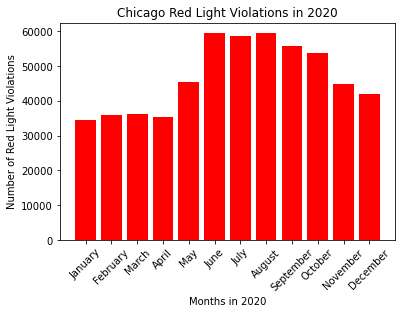

In [78]:
#bar plot generation
plt.xticks(rotation = 45)
plt.title("Chicago Red Light Violations in 2020")
plt.xlabel("Months in 2020")
plt.ylabel("Number of Red Light Violations")
plt.savefig("2020_red_light")
plt.bar(x_axis, number_red_violations, color="r", align="center")

In [79]:
# Yearly Summary Graph

Months_in_2019 = ["January", "February", "March", "April", "May", "June",
                "July","August", "September", "October", "November", "December"]
number_red_violations = [30818, 32434, 42812, 42792, 50148, 53573, 53467, 52991, 46954, 44695, 39312, 40007]
x_axis = np.arange(len(number_red_violations))
x_axis = Months_in_2019

<BarContainer object of 12 artists>

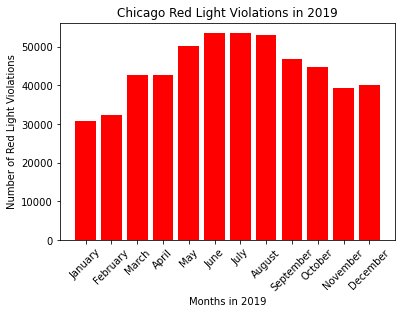

In [80]:
#bar plot generation
plt.xticks(rotation = 45)
plt.title("Chicago Red Light Violations in 2019")
plt.xlabel("Months in 2019")
plt.ylabel("Number of Red Light Violations")
plt.savefig("2019_red_light")
plt.bar(x_axis, number_red_violations, color="r", align="center")